In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102481 non-null  object 
 12  cancellation_pol

In [5]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [6]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     118
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
df.shape

(102599, 26)

In [11]:
df_clean = df.dropna(subset=['NAME','host_identity_verified','host name','neighbourhood group','neighbourhood','lat','long','country','country code','instant_bookable','cancellation_policy','Construction year','price','service fee','minimum nights','number of reviews','last review','reviews per month','review rate number','calculated host listings count','availability 365','house_rules','license'])

In [13]:
df_clean.shape

(1, 26)

In [16]:
df.drop(labels=['license'],axis=1, inplace=True)

In [17]:
df.shape

(102599, 25)

In [18]:
df_clean = df.dropna(subset=['NAME','host_identity_verified','host name','neighbourhood group','neighbourhood','lat','long','country','country code','instant_bookable','cancellation_policy','Construction year','price','service fee','minimum nights','number of reviews','last review','reviews per month','review rate number','calculated host listings count','availability 365','house_rules'])

In [19]:
df_clean.shape

(39621, 25)

In [20]:
df_clean.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
38,1022323,Cute apt in artist's home,88653822946,verified,Joyce,Brooklyn,Bushwick,40.70186,-73.92745,United States,...,"$1,097",$219,2.0,231.0,6/22/2019,1.96,3.0,2.0,214.0,Please no shoes inside the house and no smoki...
42,1024533,Beautiful Sunny Park Slope Brooklyn,50357575975,verified,Alina,Brooklyn,South Slope,40.66278,-73.97966,United States,...,$370,$74,3.0,15.0,5/27/2019,0.39,2.0,1.0,33.0,"No smoking inside. Since I have a dog, there a..."
44,1025637,West Side Retreat,55430108992,unconfirmed,Alford,Manhattan,Upper West Side,40.79009,-73.97927,United States,...,$856,$171,4.0,81.0,6/16/2019,0.69,3.0,1.0,86.0,Free WiFi! * No smoking anywhere on property. ...


In [25]:
pie_chart = px.pie(labels=np.array(df_clean['neighbourhood'].value_counts().index),values=[x for x in df_clean['neighbourhood'].value_counts()],names=df_clean['neighbourhood'].value_counts().index)
pie_chart.update_traces(textposition = 'inside',textinfo='percent+label', sort=False, title = "Neighborhood Distribution") 
pie_chart.show()

In [32]:
text = " ".join(i for i in df_clean['NAME'])
word_cloud = WordCloud(collocations = False, background_color = 'black',
                       width = 4096, height = 2160).generate(text)
word_cloud.to_file('got.png')

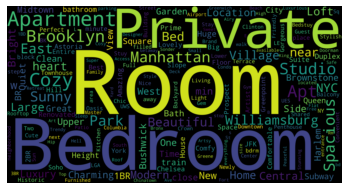

In [33]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()